In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fourier Transform

The Fourier transform is represented by the following equations:

$$\hat{S}(f) = \int_{-\infty}^{\infty} S(t) e^{-j 2\pi f t} dt$$

$$S(t) = \int_{-\infty}^{\infty} \hat{S}(f) e^{j 2\pi f t} df$$

Here, $ S(t) $ is our time series that we want to analyze. $ \hat{S}(f) $ is the Fourier transform of $ S(t) $ , expressed as a function of frequency $ f $. The Fourier transform $ \hat{S}(f) $ is a complex function, comprising both real and imaginary parts. The magnitude of the Fourier transform represents the amplitude of the frequency components, while the phase of the Fourier transform indicates the phase shift of each frequency component relative to the origin.

Consider a time series defined as a combination of a sine and a cosine function:

$$S(t) = A\sin(2 \pi f_1 t + \phi_1) + B\cos(2 \pi f_2 t + \phi_2)$$

In this equation:
- $ f_1 $ and $ f_2 $ denote the frequencies of the sine and cosine components, respectively.
- $ \phi_1 $ and $ \phi_2 $ are the phases of these components.
- $ A $ and $ B $ represent the amplitudes of the sine and cosine components, respectively.

By selecting specific frequencies, phases, and amplitudes for these sine and cosine components, we can construct a time series for which the Fourier transform can be calculated, allowing us to observe and analyze how these components contribute to the overall frequency spectrum of the signal.

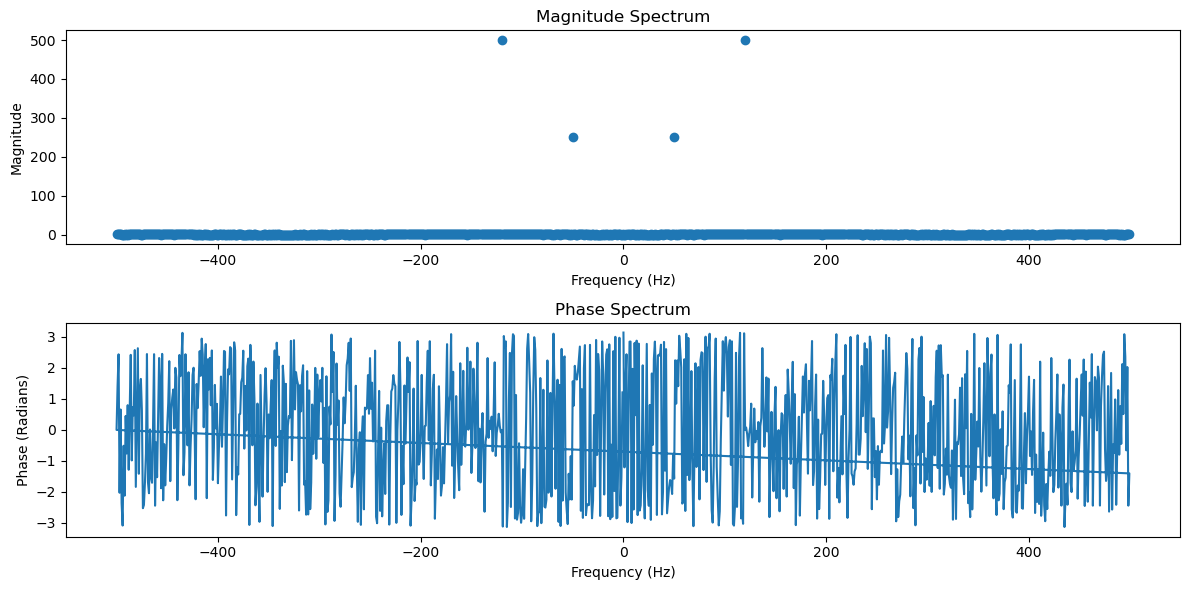

In [7]:

fs = 1000  
t = np.linspace(0, 1, fs, endpoint=False)  # Generates fs points between 0-1 Seconds

# Time series with specific frequencies and phases
A = 0.5  # Amplitude for the first sine wave
B = 1.0  # Amplitude for the second cosine wave
f1 = 50   # Frequency of the first sine wave
phi1 = 0  # Phase of the first sine wave
f2 = 120  # Frequency of the second cosine wave
phi2 = 0  # Phase of the second cosine wave

# Time series definition
signal = A * np.sin(2 * np.pi * f1 * t + phi1) + B * np.cos(2 * np.pi * f2 * t + phi2)

# FFT Magnitude and Phase
fft_values = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(signal), 1/fs) 

magnitude = np.abs(fft_values)
phase = np.angle(fft_values)

plt.figure(figsize=(12, 6))

# Magnitude
plt.subplot(2, 1, 1)
plt.scatter(fft_freq, magnitude)  
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Phase
plt.subplot(2, 1, 2)
plt.plot(fft_freq, phase) 
plt.title('Phase Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (Radians)')

plt.tight_layout()
plt.show()


Using the Fourier Transform, we can plot the magnitude and phase spectrum to identify and analyze the frequency content of the signal. The magnitude plot will show peaks at $f_1 = 50$ HZ and $f_2 = 100$ HZ, indicating the presence of these frequencies, while the phase plot will provide insights into how these frequencies are shifted in time relative to a standard cosine wave at $t = 0$.


- **Magnitude**: The magnitude of the Fourier transform, $ |\hat{S}(f)| $, represents the amplitude of the frequency component. It indicates the strength or intensity of the frequency present in the signal.
- **Phase**: The phase of the Fourier transform, $ \arg(\hat{S}(f))$, tells us the phase shift of the frequency component relative to a cosine wave starting at time zero (not very useful for nomaly detection in oil and gas operations).

# Power Law

A **power law** is a functional relationship between two quantities, where one quantity varies as a power of another,  independent of the initial size of those quantities. This is generally represented by the equation:


$$S(t) = c \cdot t^{-\alpha}$$

where:
- $ S(t) $ and $ t $ are variables,
- $ c $ is a constant coefficient,
- $ \alpha $ is the power law exponent.

**Scale invariance**

$$S(ct)=c(ct)^{-\alpha}=c^{-\alpha}S(t)\propto S(t)$$

scaling by a constant $c$ simply multiplies the original power-law relation by the constant $c^{-\alpha}$. This property makes power laws suitable for describing phenomena where the same patterns occur at various scales, such as in fractals.

Many physical systems exhibit phenomena that look similar at different scales. This property is called scale invariance, and power laws are mathematical representations of this behavior. 

**Decay velocity**

$$\frac{dS}{dt}=-\alpha c \cdot t^{-\alpha-1}$$

The decay velocity of a power law is proportional to the power of the time variable. This means that the rate of change of the power-law function decreases as the time variable increases.

on the other hand for a exponential function:

$$S(t)=c \cdot e^{-\alpha t}$$

$$\frac{dS}{dt}=-\alpha c \cdot e^{-\alpha t}$$

The decay velocity of an exponential function is proportional to the function itself. This means that the rate of change of the exponential function is constant over time. This show that power law decay slower than exponential functions.

**Log-Log Linearity**

When both variables $ t $ and $ S(t) $ are plotted on a log-log scale, a power-law relationship appears as a straight line.

$$\log(S(t)) = \log(c) - \alpha \log(t)$$

The slope of the line corresponds to the power-law exponent $ \alpha $, while the intercept represents the constant coefficient $ c $ as in a linear equation like $Y = c - \alpha T$. 

**Fourier Transform and Power law**

In many physical systems, signals exhibit scale-invariant behavior, meaning their characteristics look the same at different scales, which can be modeled by power laws. This is especially true for systems that transition between phases, such as slugging in oil and gas pipelines, where fluctuations in flow patterns can follow power-law dynamics.

The Fourier Transform decomposes a signal into its frequency components, giving us information about how different frequencies contribute to the overall signal. The magnitude of the Fourier transform tells us the amplitude of these frequency components. When a signal follows a power law, its frequency spectrum (obtained from the Fourier transform) will exhibit a specific behavior that decays according to a power law.

The magnitude of the Fourier transform, $ |\hat{S}(f)| $, represents the strength of each frequency component. For many complex systems, this magnitude follows a **power-law decay** with respect to the frequency:

$$ |\hat{S}(f)| \propto f^{-\alpha} $$

where:
- $ f $ is the frequency,
- $ \alpha $ is the **power-law exponent**,
- $ |\hat{S}(f)| $ is the magnitude of the Fourier transform at frequency $ f $.

This power-law decay implies that the energy or amplitude of the signal is concentrated in lower frequencies and decreases as a function of $ f $ raised to the power of $ -\alpha $. Such behavior is typical in systems exhibiting **scale invariance** or critical phenomena (e.g., phase transitions).

If $ |\hat{S}(f)| \propto f^{-\alpha} $, then taking the logarithm of both sides gives:

$$ \log |\hat{S}(f)| = -\alpha \log(f) + \log(C) $$

Where $ \log(C) $ is a constant shift.

This is the equation of a straight line, with:
- **Slope** = $ -\alpha $,
- **Intercept** = $ \log(C) $.

In practical terms, by fitting a straight line to the **log-log plot** of the magnitude spectrum, you can estimate the **power-law exponent** $ \alpha $. This provides insight into the behavior of the system, especially in the context of phase transitions.


**Example**

To better elucidate the mathematical connections between a power-law distribution in the amplitude of frequency components of a signal and its representation in the Fourier Transform (FT) consider this signal composed of multiple cosine waves, each wave has an amplitude that decreases as a power of its frequency. 

$$S(t) = \sum_{i=1}^N A(f_i) \cos{(2\pi f_i t + \phi_i)}$$


For each frequency $ f $ in the signal, the amplitude $ A(f) $ is given by:

$$A(f) = \frac{1}{f^\alpha}$$

where $ \alpha $ is the power law exponent. This means that as the frequency increases, the amplitude of its corresponding component in the signal decreases following a power law. To show this, consider the signal wave $S(t)$. The cosine can be written as:

$$\cos{(2\pi f_i t + \phi_i)} = e^{j \phi_i} \frac{e^{j(2\pi f_i t)}+ e^{-j(2\pi f_i t)}}{2}$$

Then the signal can be written as:

$$S(t) = \sum_{i=1}^N \frac{A_ie^{j \phi_i}}{2} \left[e^{j(2\pi f_i t)}+ e^{-j(2\pi f_i t)}\right]$$

taking the fourier transform of the signal:

$$\hat{S}(f) = \int_{-\infty}^{\infty} \bigg(\sum_{i=1}^N \frac{A_ie^{j \phi_i}}{2} \left[e^{j(2\pi f_i t)}+ e^{-j(2\pi f_i t)}\right]\bigg)  e^{-j 2\pi f t} dt$$

Since the sum is finite and the functions are integrable, we can interchange the sum and the integral

$$\hat{S}(f) = \sum_{i=1}^N \frac{A_i e^{j \phi_i}}{2} \int_{-\infty}^{\infty} \left[ e^{j 2\pi f_i t} + e^{-j 2\pi f_i t} \right] e^{-j 2\pi f t} dt$$

- For $e^{j 2\pi f_i t} $:

$$e^{j 2\pi f_i t} \cdot e^{-j 2\pi f t} = e^{j 2\pi (f_i - f) t}$$


- For $ e^{-j 2\pi f_i t} $:


$$e^{-j 2\pi f_i t} \cdot e^{-j 2\pi f t} = e^{-j 2\pi (f + f_i) t}$$

Then the Fourier transform of the signal can be written as:

$$\hat{S}(f) = \sum_{i=1}^N \frac{A_i e^{j \phi_i}}{2} \bigg[    \int_{-\infty}^{\infty} e^{j 2\pi (f_i - f) t} dt + \int_{-\infty}^{\infty} e^{-j 2\pi (f + f_i) t} dt \bigg]$$


for the first integral, let's use a interval from T to -T and then take the limit as $T \to \infty$:

$$I_1(T) = \int_{-T}^{T} e^{j 2\pi (f_i - f) t} dt = \left[ \frac{e^{j 2\pi (f_i - f) t}}{j 2\pi (f_i - f)} \right]_{-T}^{T}$$

then the result is the following:

$$I_1(T) = \frac{e^{j 2\pi (f_i - f) T} - e^{-j 2\pi (f_i - f) T}}{j 2\pi (f_i - f)}$$

Simplifying the expression using Euler's formula:

$$I_1(T) = \frac{2j \sin(2\pi (f_i - f) T)}{j 2\pi (f_i - f)} = \frac{\sin(2\pi (f_i - f) T)}{\pi (f_i - f)}$$

- If $ f \ne f_i $, the sine function oscillates rapidly, and the integral averages out to zero.
- If $f = f_i $, the denominator becomes zero, but the numerator approaches $\sin(0) = 0 $. The limit is indeterminate but represents an impulse at $f = f_i $.

Then the result is a delta of Dirac function:

$$\lim_{T \to \infty} I_1(T) = \delta(f - f_i)$$

The fourier transform of the signal result in:

$$\hat{S}(f) = \sum_{i=1}^N \frac{A_i e^{j \phi_i}}{2} \left[ \delta(f - f_i) + \delta(f + f_i) \right]$$


So if the $ f \ne f_i $ the term in the sum will be zero, and for $f = f_i$ the term will be $\frac{A(f)}{2} e^{j \phi_i}$. Taking the magnitude of the Fourier transform:

$$A(f) = 2|\hat{S}(f)|$$

If the magnitude of the Fourier Transform follows a power-law decay with respect to frequency:

$$|\hat{S}(f)| \propto f^{-\alpha}$$

Then:

$$A(f_i) = 2|\hat{S}(f)| = 2c f^{-\alpha} $$

This shows that the amplitude $A(f)$ decreases as the frequency increases as a power of the frequency:

$$A(f) \propto f^{-\alpha}$$

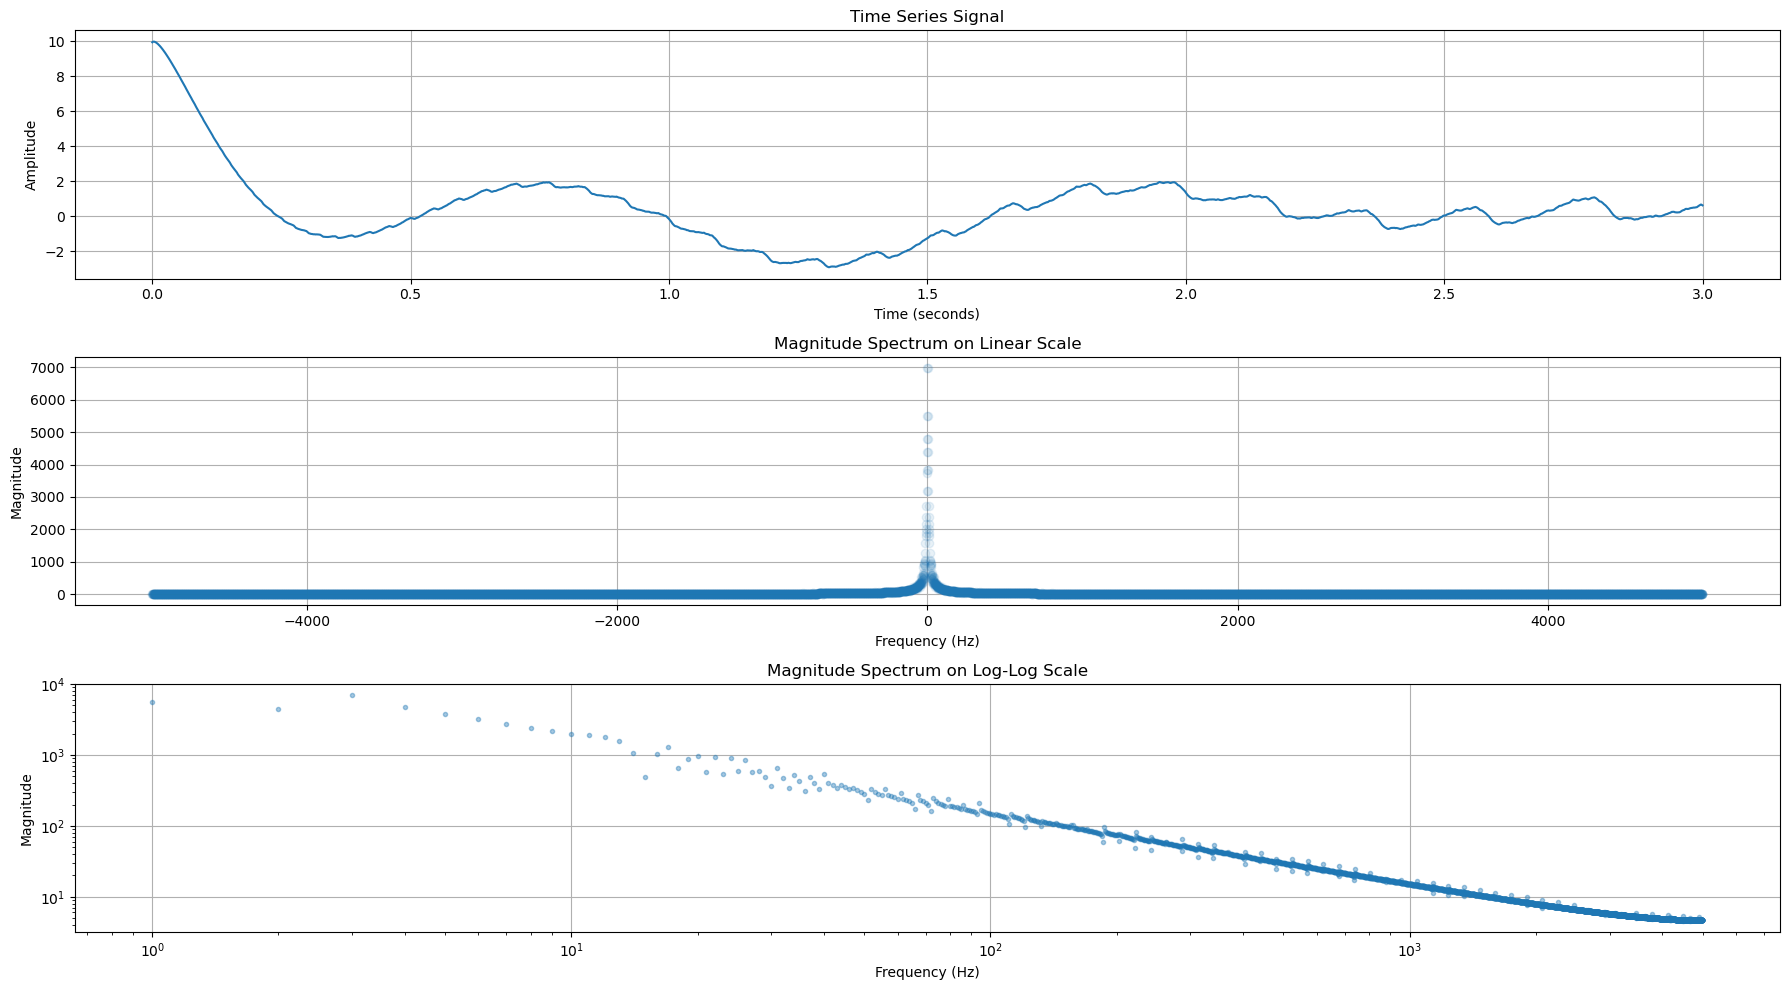

In [42]:
# Synthetic Signal for a sum of cosines with different frequencies and amplitudes
# Amplitude follows a power law f^(-alpha)

fs = 10000 
t = np.linspace(0, 3, fs, endpoint=False)  # Generates fs points between 0-1 Seconds
n_frequencies = 100 

frequencies = np.logspace(np.log10(1), np.log10(fs/2), num=n_frequencies) # Generates n_frequencies points between 0 - log10(fs/2) HZ
alpha = 1.230726  # Power law exponent
amplitudes = 1 / frequencies**alpha  # to guarantee that  Amplitude follows power law f^(-alpha)

# Generate the signal with zero phases
# Series of cosines with different frequencies and amplitudes
signal = np.zeros_like(t)
for freq, amp in zip(frequencies, amplitudes):
    signal += amp * np.cos(2 * np.pi * freq * t)  + 1/2*amp * np.sin(2 * np.pi * freq/2 * t)  
    
# FFT magnitude
fft_values = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(t), 1/fs)
magnitude = np.abs(fft_values)


plt.figure(figsize=(18, 10))

# Time Domain Plot
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Time Series Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)

# Linear Scale
plt.subplot(3, 1, 2)
plt.plot(fft_freq, magnitude, 'o', alpha = 0.1) 
plt.title('Magnitude Spectrum on Linear Scale')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Log-Log Scale
plt.subplot(3, 1, 3)
plt.loglog(fft_freq, magnitude, 'o', alpha = 0.4, markersize=3)  
plt.title('Magnitude Spectrum on Log-Log Scale')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)


plt.tight_layout()
plt.show()